# Logistic Regression and Classification Error Metrics

### Human Activity Recognition with Smartphones

In [1]:
import os
from __future__ import print_function

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [2]:
import pandas as pd
import seaborn as sns

data_path = ['../data/']
file_name = ['Human_Activity_Recognition_Using_Smartphones_Data.csv']
file_path = os.sep.join(data_path+file_name)
data = pd.read_csv(file_path)
#print(data.dtypes)
#data.head()


In [3]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [4]:
print(data.iloc[:,:-1].min().value_counts())
print(data.iloc[:,:-1].max().value_counts())


-1.0    561
dtype: int64
1.0    561
dtype: int64


In [5]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le =  LabelEncoder()
data['Activity'] = le.fit_transform(data['Activity'])
data['Activity'].sample(10)

969     5
6674    1
873     2
8598    1
8297    1
2100    1
7521    2
4231    1
6936    4
9462    0
Name: Activity, dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [7]:
feature_columns = data.columns[:-1]
corr_values = data[feature_columns].corr()
#corr_values

In [8]:

trail_index = np.tril_indices_from(corr_values)

trail_index
for coord in zip(*trail_index):
    corr_values.iloc[coord[0],coord[1]] =np.NaN
#corr_values = (corr_values.stack().to_frame().reset_index())   
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns = {'level_0':'feature_1',
                                            'level_1':'feature_2',0:'correlation'}))
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.head()

,feature_1,feature_2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071


[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Absolute Correlation'),
 Text(0.5,1,'Correlation')]

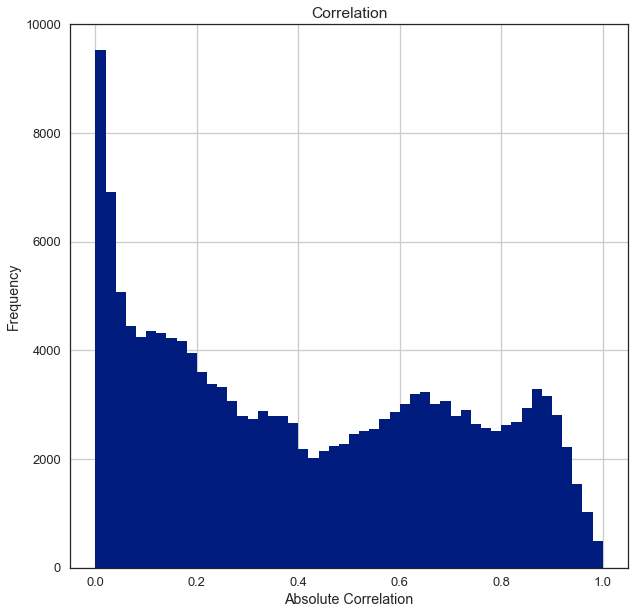

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')
ax = corr_values.abs_correlation.hist(bins=50)
ax.set(xlabel='Absolute Correlation',ylabel='Frequency',title='Correlation')

In [10]:
corr_values = corr_values.sort_values('correlation',ascending=False).query('abs_correlation > .8')
corr_values.tail(7)

,feature_1,feature_2,correlation,abs_correlation
36294,"tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2",-0.991609,0.991609
27793,tGravityAcc-max()-Z,"angle(Z,gravityMean)",-0.992689,0.992689
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764
38252,"tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2",-0.995195,0.995195


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1 ,test_size = .3,random_state = 42)

train_index, test_index = next(sss.split(data[feature_columns],data.Activity))
X_train = data.loc[train_index,feature_columns]
Y_train = data.loc[train_index,'Activity']
X_test = data.loc[test_index,feature_columns]
Y_test = data.loc[test_index,'Activity']



In [12]:
Y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [13]:
Y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)

In [16]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
from sklearn.linear_model import LogisticRegressionCV
lr_l1 = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear')
lr_l1.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [18]:
lr_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2')
lr_l2.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [22]:
models = [lr,lr_l1,lr_l2]
labels = ['lr','lr_l1','lr_l2']

coefficients = list()
lr_l1.coef_
for lab,mod in zip(labels,models):
    coeff = mod.coef_
    coeff_labels = pd.MultiIndex(levels = [[lab],[0,1,2,3,4,5]],
                                labels = [[0,0,0,0,0,0],[0,1,2,3,4,5]],names=['first','second'])
    coefficients.append(pd.DataFrame(coeff.T,columns=coeff_labels))
    print(coeff)
    
coefficients = pd.concat(coefficients,axis=1)


[[-0.08750646  0.01449275  0.03018717 ...,  1.59910474 -0.3743129
  -0.18830925]
 [-0.44522584 -0.20104648  0.06319637 ..., -2.47309446 -0.74039698
  -0.2980224 ]
 [ 0.25796347  0.06089227  0.24590906 ..., -0.85461228  1.77145495
   0.41692013]
 [-0.16928095 -0.02350969  0.02234019 ..., -0.31314455 -0.24290354
   0.0650486 ]
 [ 0.76561082  0.1079669   0.0589804  ..., -0.71269424 -0.27513866
  -0.04236269]
 [-0.08008384 -0.24719318 -0.40252633 ...,  0.4163113   0.87672796
   0.43881539]]
[[-0.32154206  0.          0.         ...,  4.40173849  0.          0.        ]
 [ 0.          0.          0.         ..., -8.00980507  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [-0.88766065  0.          0.         ..., -0.33829697 -0.41244606  0.        ]
 [ 4.43169957  0.          0.         ..., -1.06616396  0.          0.        ]
 [ 0.          0.          0.         ...,  0.35470718  1.94125999
   1.159715  ]]
[[-0.2357898   0.05838939

## Question 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [24]:
levels = ['lr','lr_l1','lr_l2']
models = [lr , lr_l1, lr_l2]

y_pred = list()
y_prob = list()

for lab,mod in zip(levels,models):
    y_pred.append( pd.Series(mod.predict(X_test), name = lab))
    y_prob.append( pd.Series(mod.predict_proba(X_test).max(axis=1), name = lab))

y_pred =pd.concat(y_pred,axis=1)
y_prob =pd.concat(y_prob,axis=1)
y_pred.head(6)

,lr,lr_l1,lr_l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0
5,5,5,5


## Question 7

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

from sklearn.preprocessing import label_binarize
#label_binarize(Y_test, classes=[0,1,2,3,4,5])
cm = dict()
metrics = list()

for lab in levels:
    precision, recall, fscore, _ = score(Y_test,y_pred[lab],average='weighted')
    accuracy = accuracy_score(Y_test,y_pred[lab])
    auc = roc_auc_score(label_binarize(Y_test,[0,1,2,3,4,5]), label_binarize(y_pred[lab],[0,1,2,3,4,5]), average = 'weighted')
    
    cm[lab] = confusion_matrix(Y_test, y_pred[lab])
    metrics.append(pd.Series({'precision':precision,
                   'recall':recall,
                   'fscore':fscore,
                   'accuracy':accuracy,
                   'auc':auc},name=lab))
    
metrics = pd.concat(metrics,axis=1)
metrics

,lr,lr_l1,lr_l2
accuracy,0.984142,0.983819,0.984466
auc,0.990384,0.990144,0.990548
fscore,0.984143,0.983815,0.984466
precision,0.984144,0.983835,0.984471
recall,0.984142,0.983819,0.984466


## Question 8

Display or plot the confusion matrix for each model.

In [43]:
cm['lr']

array([[583,   0,   0,   0,   0,   0],
       [  0, 512,  21,   0,   0,   0],
       [  0,  22, 550,   0,   0,   0],
       [  0,   0,   0, 515,   1,   1],
       [  0,   0,   0,   1, 420,   1],
       [  0,   0,   0,   1,   1, 461]])

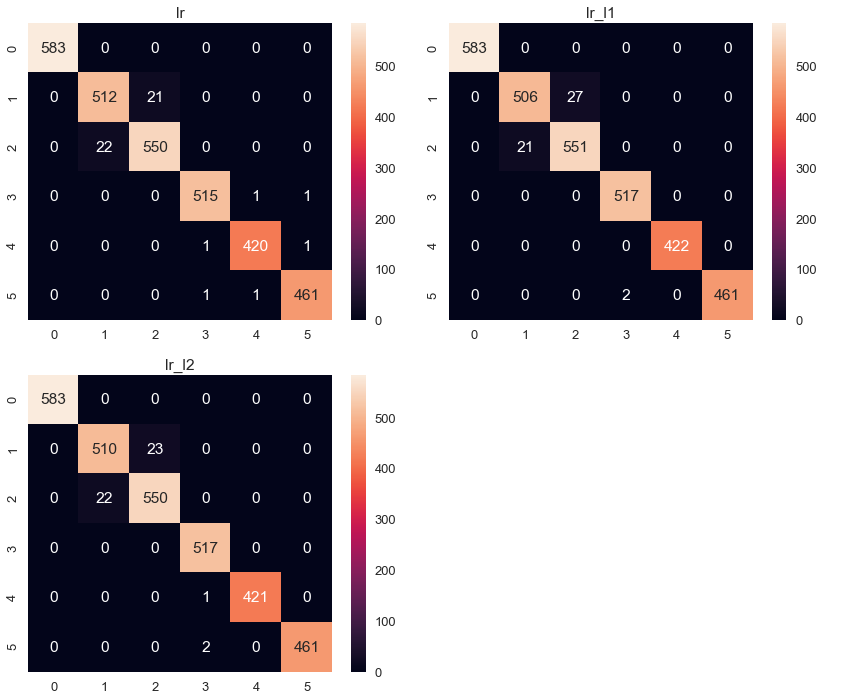

In [52]:
fig, axList = plt.subplots(nrows=2,ncols=2)
axList = axList.flatten()

fig.set_size_inches(12,10)
axList[-1].axis('off')

for axes, lab in zip(axList[:-1],levels):
    sns.heatmap(cm[lab],ax = axes, annot=True,fmt='d')
    axes.set(title=lab)
    
plt.tight_layout()

## Question 9
 Identify highly correlated columns and drop those columns before building models

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data2 = pd.concat([X_train,X_test])
data_new = pd.DataFrame(sel.fit_transform(data2))


data_y = pd.concat([Y_train,Y_test])

from sklearn.model_selection import train_test_split

X_new,X_test_new = train_test_split(data_new)
Y_new,Y_test_new = train_test_split(data_y)

In [66]:
LR = LogisticRegression()
LR.fit(X_new,Y_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
lr_l1_new = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear')
lr_l1_new.fit(X_new,Y_new)

In [ ]:
lr_l2_new = LogisticRegressionCV(Cs=10,cv=4,penalty='l2')
lr_l2_new.fit(X_new,Y_new)

In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

## Question 10

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

###### Prepare six separate plots for each of the multi-class coefficients.

## Question 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

## Question 12

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

## Question 13

Display or plot the confusion matrix for each model.